#### **Importing and loading dataset**

In [1]:
import pandas as pd

df = pd.read_json("hf://datasets/toughdata/quora-question-answer-dataset/Quora-QuAD.jsonl", lines=True)
df.to_csv('dataset.csv', index=False) #saving csv for reference
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 56402 entries, 0 to 56401
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   question  56402 non-null  object
 1   answer    56402 non-null  object
dtypes: object(2)
memory usage: 1.3+ MB


#### **Data Exploration, cleaning and preprocessing**

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 56402 entries, 0 to 56401
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   question  56402 non-null  object
 1   answer    56402 non-null  object
dtypes: object(2)
memory usage: 1.3+ MB


In [3]:
df.head(20)

,question,answer
0,Why whenever I get in the shower my girlfriend...,Isn’t it awful? You would swear that there was...
1,"What is a proxy, and how can I use one?",A proxy server is a system or router that prov...
2,"What song has the lyrics ""someone left the cak...",MacArthur's Park\n
3,I am the owner of an adult website called http...,Don't let apps that are liers put adds on your...
4,Does the Bible mention anything about a place ...,St. John in the book of Revelation mentions an...
5,What are useful free and open-source tools for...,"Can't live without screen, vim, git, puppet, f..."
6,The justice department has told the state of M...,🤣🤣🤣 its not much different than states legaliz...
7,Why are the Kardashians so popular? Why are pe...,Answer is simple - They are rich and beautiful...
8,How fast could the US Air Force SR-71 Blackbir...,These questions are always tilted by purpose a...
9,Did a landlord ever offer to lower your rent s...,it’s never happened that a landlord has offere...


In [4]:
df.tail(20)

,question,answer
56382,Will the megacomet heading towards Earth hit E...,"You know, “headed towards Earth"" in this case ..."
56383,"As a doctor, what is the most stunning lack of...","This is the opposite.\n I had my son, natural ..."
56384,What do you think about President Biden's revo...,Biden is a total moron. If he had a brain he’d...
56385,Which online booking system should I use on my...,depends on your need…. are you selling your ow...
56386,Have you ever found out your kid wasn’t yours ...,Happened to a close friend’s parents.\n The mo...
56387,"If Martian soil is toxic, can't be terraformed...",You mean the man who shot a Tesla into the sun...
56388,What are the qualities of a successful leader?,A good leader possesses a variety of qualities...
56389,Why is SRK the biggest superstar in India?,yes\n
56390,How can I download magazines for free on the I...,Free books can be found on the wonderful Proje...
56391,Why do cats abandon their owners?,What do you mean by abandon? Did cat sleek out...


In [5]:
missing_values=df.isnull().sum()
print(missing_values)

question    0
answer      0
dtype: int64


In [6]:
unique_questions = df['question'].nunique()
unique_answers = df['answer'].nunique()

print(f"Number of unique questions: {unique_questions}")
print(f"Number of unique answers: {unique_answers}")


Number of unique questions: 3234
Number of unique answers: 54726


In [7]:
# Find questions with more than 1 frequency
question_counts = df['question'].value_counts()
questions_more_than_once = question_counts[question_counts > 1]

# Find answers with more than 1 frequency
answer_counts = df['answer'].value_counts()
answers_more_than_once = answer_counts[answer_counts > 1]

print('number of questions more than once:', len(question_counts[question_counts > 1]) ,'\n number of answers more than once:', len(answer_counts[answer_counts > 1]))

number of questions more than once: 2891 
 number of answers more than once: 646


In [8]:
questions_more_than_once.head()

question
Would Hillary Clinton have made a better President than Donald J Trump?               106
What is the most horrible thing you have seen while in a mental hospital?             104
Which is the best travel portal development company?                                  102
My partner of one month doesn’t like my therapy dog of 10 years. What should I do?    102
Is investing in cryptocurrency still profitable?                                      102
Name: count, dtype: int64

In [9]:
answers_more_than_once.head()

answer
No\n                                                                                                                                                                                                                                                                                                                                                                                                                                                      89
Yes\n                                                                                                                                                                                                                                                                                                                                                                                                                                                     81
No.\n                                                                                                  

/tmp/ipykernel_1097/649812539.py:25: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


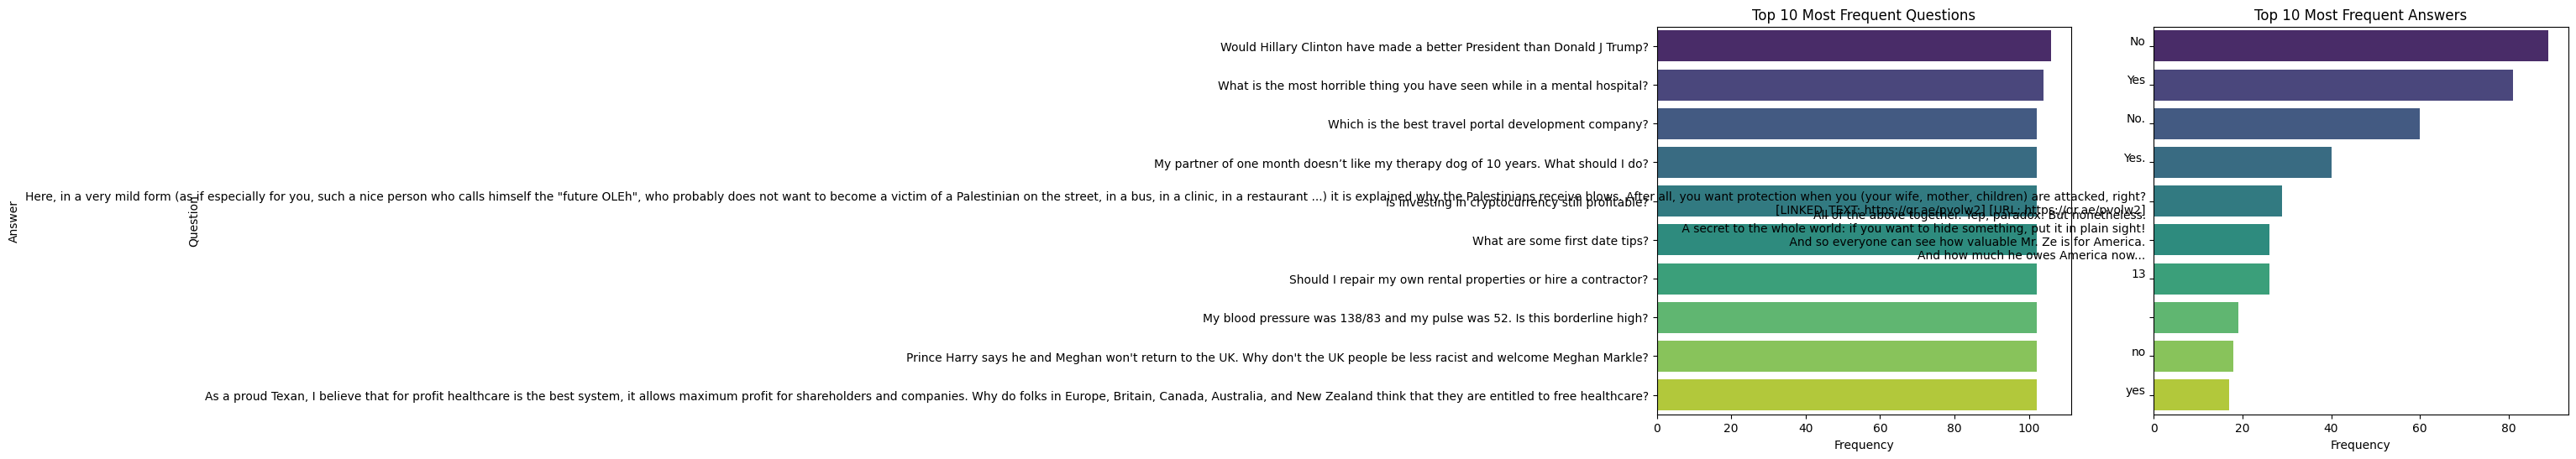

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

duplicate_questions = df['question'].value_counts()
duplicate_answers = df['answer'].value_counts()

# Most frequent questions
top_questions = duplicate_questions.head(10)
top_answers = duplicate_answers.head(10)

# Plot the most frequent questions and answers
plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
sns.barplot(y=top_questions.index, x=top_questions.values, palette="viridis")
plt.title('Top 10 Most Frequent Questions')
plt.xlabel('Frequency')
plt.ylabel('Question')

plt.subplot(1, 2, 2)
sns.barplot(y=top_answers.index, x=top_answers.values, palette="viridis")
plt.title('Top 10 Most Frequent Answers')
plt.xlabel('Frequency')
plt.ylabel('Answer')

plt.tight_layout()
plt.show()

-   ***Dataset Information:***
    
    -   The dataset contains 56,402 entries.
    -   There are 2 columns: `question` and `answer`.
    -   Both columns have no missing values and are of type `object`.

-   ***Missing Values:***
    
    -   There are no missing values in the dataset.
    
    
-   ***Unique and frequent values*:**
    
    -   There are 3,234 unique questions.
    -   There are 54,726 unique answers.
    -   2891 questions have appeared more than once.
    -   646 answers have appeared more than once.
    -   The most frequent question appears 106 times.
    -   The most frequent answer appears 89 times.

In [11]:
duplicate_rows = df[df.duplicated()]
len(duplicate_rows)

1220

In [12]:
df.describe(include='all')

,question,answer
count,56402,56402
unique,3234,54726
top,Would Hillary Clinton have made a better Presi...,No\n
freq,106,89


In [13]:
df = df.drop_duplicates()

print(f"Number of duplicate rows removed: {len(duplicate_rows)}")
print(f"Number of rows after removing duplicates: {len(df)}")

Number of duplicate rows removed: 1220
Number of rows after removing duplicates: 55182


In [14]:
df['question_length'] = df['question'].apply(len)
df['answer_length'] = df['answer'].apply(len)

question_length_stats = df['question_length'].describe()
answer_length_stats = df['answer_length'].describe()

question_length_stats, answer_length_stats

(count    55182.000000
 mean        78.197800
 std         48.987202
 min         11.000000
 25%         46.000000
 50%         61.000000
 75%         94.000000
 max        250.000000
 Name: question_length, dtype: float64,
 count     55182.000000
 mean        937.855913
 std        4009.906798
 min           1.000000
 25%         148.000000
 50%         419.000000
 75%        1062.000000
 max      411036.000000
 Name: answer_length, dtype: float64)

| Statistic                     | Question Length | Answer Length  |
|-------------------------------|-----------------|----------------|
| **Count**                     | 55,182          | 55,182         |
| **Mean Length**               | 78 characters   | 938 characters |
| **Standard Deviation**        | 49 characters   | 4,010 characters|
| **Minimum Length**            | 11 characters   | 1 character    |
| **25th Percentile**           | 46 characters   | 148 characters |
| **Median (50th Percentile)**  | 61 characters   | 419 characters |
| **75th Percentile**           | 94 characters   | 1,062 characters|
| **Maximum Length**            | 250 characters  | 411,036 characters|


AttributeError: Rectangle.set() got an unexpected keyword argument 'kde'

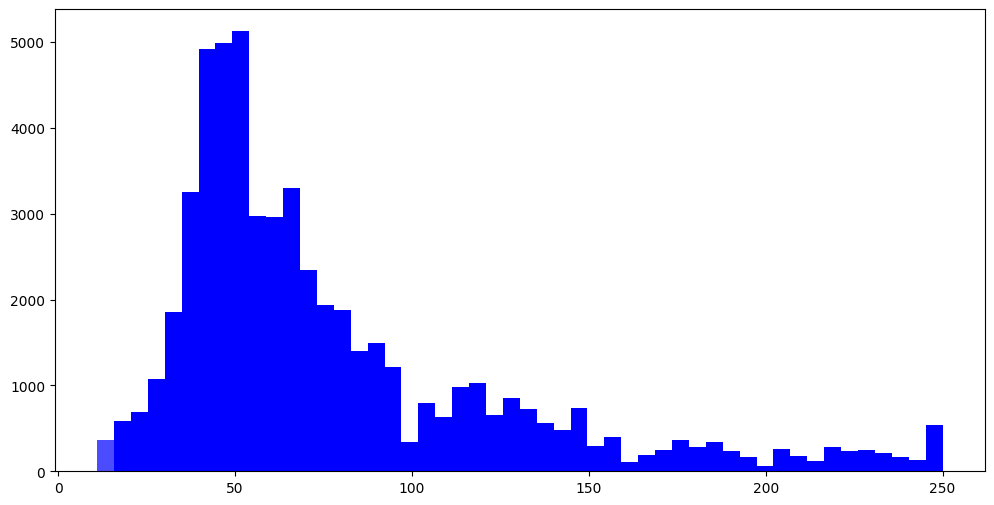

In [15]:
import matplotlib.pyplot as plt

# Calculate lengths of questions and answers
df['question_length'] = df['question'].apply(len)
df['answer_length'] = df['answer'].apply(len)

# Plot the distribution of question lengths
plt.figure(figsize=(12, 6))
plt.hist(df['question_length'], bins=50, alpha=0.7, color='blue', label='Question Length', kde=True)
plt.title('Distribution of Question Lengths')
plt.xlabel('Length')
plt.ylabel('Frequency')
plt.legend()
plt.grid(True)
plt.show()

# Plot the distribution of answer lengths

plt.figure(figsize=(12, 6))
plt.hist(df['answer_length'], bins=50, color='green', alpha=0.7, kde=True)
plt.title('Distribution of Answer Lengths')
plt.xlabel('Answer Length')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

plt.figure(figsize=(12, 6))
plt.hist(df['answer_length'], bins=50, color='green', alpha=0.7, kde=True)
plt.yscale('log')
plt.title('Distribution of Answer Lengths')
plt.xlabel('Answer Length')
plt.ylabel('Frequency (log scale)')
plt.grid(True)
plt.show()


In [ ]:
# Box plots
import seaborn as sns

plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
sns.boxplot(x=df['question_length'])
plt.title('Question Length Box Plot')

plt.subplot(1, 2, 2)
sns.boxplot(x=df['answer_length'])
plt.title('Answer Length Box Plot')

plt.tight_layout()
plt.show()

-   ***Question Length Distribution*:**
    
    -   Most questions have lengths between 40 to 100 characters.
    -   There is a smaller frequency of questions with lengths reaching up to 250 characters.
-   ***Answer Length Distribution:***
    
    -   Answer lengths vary widely, with a large number of answers having lengths around 100 to 1000 characters.
    -   A log scale was used for the y-axis due to the presence of some extremely long answers (up to 411,036 characters)

### Steps in Data Exploration and Cleaning

1.  **Normalize Text Data:**
    
    -   Convert all text to lowercase.
    -   Remove special characters and punctuation.
    -   Remove URLs.
2.  **Tokenize Text:**
    
    -   Split text into individual words or tokens.
3.  **Remove Stop Words:**
    
    -   Remove common words that do not contribute to the meaning of the text.
4.  **Apply Stemming or Lemmatization:**
    - Reduce words to their base or root forms.

In [ ]:
import re
import string
import nltk
from nltk.stem import PorterStemmer, WordNetLemmatizer


def clean_text(text):
    # Convert text to lowercase
    text = text.lower()
    # Remove URLs
    text = re.sub(r'http\S+|www\S+|https\S+', '', text, flags=re.MULTILINE)
    # Remove punctuation
    text = text.translate(str.maketrans('', '', string.punctuation))
    # Remove numbers
    text = re.sub(r'\d+', '', text)
    # Remove extra whitespace
    text = text.strip()
    text = re.sub(r'\s+', ' ', text)
    return text

# Apply the clean_text function to both question and answer columns
df['question'] = df['question'].apply(clean_text)
df['answer'] = df['answer'].apply(clean_text)

In [ ]:
df[['question','answer']].to_csv('cleaned_data.csv', index = False)

In [ ]:
import pandas as pd
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

nltk.download('stopwords')
nltk.download('punkt')

# Define stop words
stop_words = set(stopwords.words('english'))

# Function to tokenize and remove stop words
def tokenize_and_remove_stopwords(text):
    # Tokenize text
    tokens = word_tokenize(text)
    # Remove stop words
    filtered_tokens = [word for word in tokens if word not in stop_words]
    return filtered_tokens

# Apply the function to both cleaned_question and cleaned_answer columns
df['tokenized_question'] = df['question'].apply(tokenize_and_remove_stopwords)
df['tokenized_answer'] = df['answer'].apply(tokenize_and_remove_stopwords)

# Display the first few rows of the tokenized data
print(df[['tokenized_question', 'tokenized_answer']].head())

In [ ]:
df[['tokenized_question','tokenized_answer']].to_csv('tokenized_data.csv', index = False)

In [ ]:
from nltk.stem import PorterStemmer, WordNetLemmatizer

nltk.download('wordnet')

# Initialize stemmer and lemmatizer
stemmer = PorterStemmer()
lemmatizer = WordNetLemmatizer()

# Function to perform stemming
def stem_tokens(tokens):
    return [stemmer.stem(token) for token in tokens]

# Function to perform lemmatization
def lemmatize_tokens(tokens):
    return [lemmatizer.lemmatize(token) for token in tokens]

df['stemmed_question'] = df['tokenized_question'].apply(stem_tokens)
df['stemmed_answer'] = df['tokenized_answer'].apply(stem_tokens)
df['lemmatized_question'] = df['tokenized_question'].apply(lemmatize_tokens)
df['lemmatized_answer'] = df['tokenized_answer'].apply(lemmatize_tokens)

In [ ]:
df[['lemmatized_question' , 'lemmatized_answer']].to_csv('lemmatized_data.csv', index = False)
#df[['stemmed_question, stemmed_answer']].to_csv('stemmed_data.csv', index = False)

### Feature Extraction, model selection, training and evaluation